# Tracks Genre Classification

- What does each playlist set sound like? What are their defining characteristics?

- Using user-marked playlist genres as training data, can we build a model to correctly classify songs from a separate track dataset?

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read and check values of 2 playlist sets

In [2]:
#set keyword
#r&b hiphop rock
KEYWORD1='r&b'

In [3]:
# read and process the playlist data for keyword
playlist1_df = pd.read_csv('data/'+KEYWORD1+'_playlist_data.csv')
playlist1_df.head(20)

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers
0,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,40,spotify,Spotify,3343023
1,37i9dQZF1DX6VDO8a6cQME,I Love My '90s R&B,45,spotify,Spotify,2486483
2,37i9dQZF1DX2UgsUIg75Vg,Chilled R&B,50,spotify,Spotify,2070234
3,37i9dQZF1DWSfMe9z89s9B,Alternative R&B,100,spotify,Spotify,957270
4,37i9dQZF1DXbirtHQBuwCo,TrenChill K-R&B,70,spotify,Spotify,535401
5,37i9dQZF1DX1wNY9tfWQsS,Women of R&B,70,spotify,Spotify,361708
6,37i9dQZF1DX2WkIBRaChxW,R&B Right Now,55,spotify,Spotify,331776
7,36scvoM0cRA50MCZGhv3wo,R&B Party Classics,134,sonymusicentertainment,Filtr Sweden,314057
8,37i9dQZF1DXch2nNxu927l,Suprême R&B,50,spotify,Spotify,275771
9,37i9dQZF1DWXbttAJcbphz,I Love My '10s R&B,50,spotify,Spotify,234940


In [4]:
playlist1_df.shape

(59, 6)

In [5]:
# read and process the playlist data for keyword
tracks1_df = pd.read_csv('data/'+KEYWORD1+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv('data/'+KEYWORD1+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')
#make duration ms to minutes
tracks1_df['duration_mins']=tracks1_df['duration']/60000
#tag genre with keyword
tracks1_df['genre']=KEYWORD1
tracks1_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,instrumentalness,liveness,valence,tempo,playlist_id_x,playlist_name_x,playlist_id_y,playlist_name_y,duration_mins,genre
0,0XkQ23l4GT8sFHgeNRGAO4,LET'S GET MARRIED,2HPaUgqeutzr3jx5a9WyDV,PARTYNEXTDOOR,2Uyia7M6Hv8XmhMSEbpfgm,224014,2021-01-29,60,0.501,0.643,...,0.000137,0.151,0.220,130.850,37i9dQZF1DX4SBhb3fqCJd,Are & Be,37i9dQZF1DX4SBhb3fqCJd,Are & Be,3.733567,r&b
1,0XkQ23l4GT8sFHgeNRGAO4,LET'S GET MARRIED,2HPaUgqeutzr3jx5a9WyDV,PARTYNEXTDOOR,2Uyia7M6Hv8XmhMSEbpfgm,224014,2021-01-29,60,0.501,0.643,...,0.000137,0.151,0.220,130.850,37i9dQZF1DX4SBhb3fqCJd,Are & Be,37i9dQZF1DWUzFXarNiofw,The Newness,3.733567,r&b
2,0XkQ23l4GT8sFHgeNRGAO4,LET'S GET MARRIED,2HPaUgqeutzr3jx5a9WyDV,PARTYNEXTDOOR,2Uyia7M6Hv8XmhMSEbpfgm,224014,2021-01-29,60,0.501,0.643,...,0.000137,0.151,0.220,130.850,37i9dQZF1DX4SBhb3fqCJd,Are & Be,37i9dQZF1DX2WkIBRaChxW,R&B Right Now,3.733567,r&b
3,3YJJjQPAbDT7mGpX3WtQ9A,Good Days,7tYKF4w9nC0nq9CsPZTHyP,SZA,781cKhbTPwLnPmo9BALQl7,279204,2020-12-25,92,0.436,0.655,...,0.000008,0.688,0.412,121.002,37i9dQZF1DX4SBhb3fqCJd,Are & Be,37i9dQZF1DX4SBhb3fqCJd,Are & Be,4.653400,r&b
4,3YJJjQPAbDT7mGpX3WtQ9A,Good Days,7tYKF4w9nC0nq9CsPZTHyP,SZA,781cKhbTPwLnPmo9BALQl7,279204,2020-12-25,92,0.436,0.655,...,0.000008,0.688,0.412,121.002,37i9dQZF1DX4SBhb3fqCJd,Are & Be,37i9dQZF1DWSfMe9z89s9B,Alternative R&B,4.653400,r&b


In [6]:
tracks1_df.shape

(1194, 25)

In [7]:
# How many unique tracks are in playlist set 1?
len(tracks1_df['track_id'].unique())

1058

<AxesSubplot:>

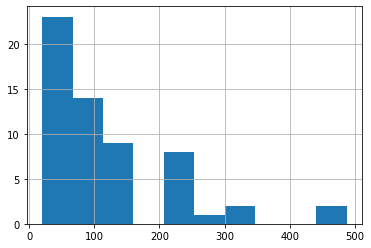

In [8]:
# What is the distribution of playlist set 1's total tracks?
playlist1_df['playlist_total_tracks'].hist()

In [9]:
len(playlist1_df[playlist1_df['playlist_total_tracks']>10])

59

<AxesSubplot:>

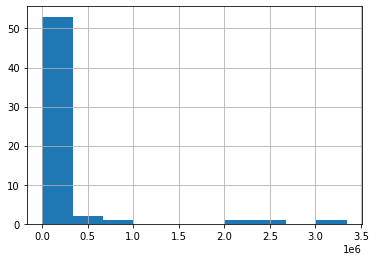

In [10]:
# What is the distribution of playlist set 1's total tracks?
playlist1_df['total_followers'].hist()

In [11]:
###################### set keyword
KEYWORD2='electronic'

In [12]:
# read and process the playlist data for keyword
playlist2_df = pd.read_csv('data/'+KEYWORD2+'_playlist_data.csv')
playlist2_df.head(20)

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers
0,37i9dQZF1DWVCHIm2MEeIy,Electronic Circus,70,spotify,Spotify,628806
1,5Udnh472z0CeexGPSpdIw9,Dance Music 2021 | Deep House & Electronica,142,x43zjmj9fxfa65thdh3xeetli,Panther's Groove,502588
2,37i9dQZF1DX8AliSIsGeKd,Electronic Rising,68,spotify,Spotify,431284
3,5CvETxDs2E5rQeNji0LPaA,Electronica & Dance Music 2021,187,kpu7ttyvk94i360ju1ym63upj,Desired Music,279646
4,37i9dQZF1DX3XuTDjo5z5z,Electronic Concentration,79,spotify,Spotify,258408
5,37i9dQZF1DWYUYYlhkTuEn,Yoga Electronica,59,spotify,Spotify,125848
6,1U4hhbOslvsB9HPwXrBuws,Gaming Music 🎮 Electronic Music 2021,94,ntf4uj17uxr1edwz1jb1gjzm3,Adept Records,124776
7,6dTEYYCzvvOdHXUid1uXj2,Electronic Dance VIBES,35,xznbyii4eo2o8yitdbexd4yv0,VIBE Lifestyle,115775
8,37i9dQZF1DWZaNRXtvIrDt,Top Shelf Electronic,75,spotify,Spotify,112163
9,37i9dQZF1DX0wMD4IoQ5aJ,Electronic Focus,98,spotify,Spotify,99687


In [13]:
playlist2_df.shape

(65, 6)

In [14]:
# read and process the playlist data for keyword
tracks2_df = pd.read_csv('data/'+KEYWORD2+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv('data/'+KEYWORD2+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')
#make duration ms to minutes
tracks2_df['duration_mins']=tracks2_df['duration']/60000
#tag genre with keyword
tracks2_df['genre']=KEYWORD2
tracks2_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,instrumentalness,liveness,valence,tempo,playlist_id_x,playlist_name_x,playlist_id_y,playlist_name_y,duration_mins,genre
0,0PkwtUYZiNpGtbkVYZkvMZ,Purple Noise,1z5xbcOeFRQXBVDpvRPh8H,MEUTE,5x7HlzUrvG4KxSrGjDEcBO,322020,2020-02-21,47,0.853,0.374,...,0.8750,0.1080,0.199,125.996,37i9dQZF1DWVCHIm2MEeIy,Electronic Circus,37i9dQZF1DWVCHIm2MEeIy,Electronic Circus,5.367000,electronic
1,0HcuetqlzCA2yDfhKuWrxz,The Oracle,27j5PRcPefcI6q8as58zWF,Mollono.Bass,3Z9EKeISsOLgsfdMNZbUO4,282520,2020-06-19,48,0.746,0.550,...,0.8890,0.0904,0.532,120.006,37i9dQZF1DWVCHIm2MEeIy,Electronic Circus,37i9dQZF1DWVCHIm2MEeIy,Electronic Circus,4.708667,electronic
2,0nXB7YWrra82OKeTa6PVWq,Fader,6cDNuaBrX01wpytv0fLTmV,Casper Cole,62KwnbwuZHGrefZAc2dlAU,373875,2020-06-19,48,0.698,0.845,...,0.8880,0.0872,0.192,123.973,37i9dQZF1DWVCHIm2MEeIy,Electronic Circus,37i9dQZF1DWVCHIm2MEeIy,Electronic Circus,6.231250,electronic
3,6IgWuSYV5Q9IA000SQ26mS,Feel Good,1YkHCcMgZ6fTQMeEQyYKTf,Moonbootica,4TL4UXRiiviP9FNn0Sx6J2,341818,2019-10-04,18,0.821,0.862,...,0.0592,0.1260,0.228,125.005,37i9dQZF1DWVCHIm2MEeIy,Electronic Circus,37i9dQZF1DWVCHIm2MEeIy,Electronic Circus,5.696967,electronic
4,6RCT4geaXTmDmtiwFLJv8j,To the Sea - Einmusik Remix,2CKaDZ1Yo8YnWega9IeUzB,Booka Shade,5mIRtNHm2HMi6vsxIS1QGl,452000,2020-06-12,54,0.741,0.853,...,0.8310,0.0757,0.124,123.998,37i9dQZF1DWVCHIm2MEeIy,Electronic Circus,37i9dQZF1DWVCHIm2MEeIy,Electronic Circus,7.533333,electronic


In [15]:
tracks2_df.shape

(2840, 25)

In [16]:
# How many unique tracks are in playlist 2?
len(tracks2_df['track_id'].unique())

2536

In [17]:
###################### set keyword
KEYWORD3='pop'

In [18]:
# read and process the playlist data for keyword
playlist3_df = pd.read_csv('data/'+KEYWORD3+'_playlist_data.csv')
playlist3_df.head(20)

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers
0,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,232,spotify,Spotify,4735038
1,37i9dQZF1DX50QitC6Oqtn,Love Pop,100,spotify,Spotify,3258215
2,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,50,spotify,Spotify,3214947
3,37i9dQZF1DX6aTaZa0K6VA,Pop Up,80,spotify,Spotify,3008206
4,37i9dQZF1DX9tPFwDMOaN1,K-Pop Daebak,50,spotify,Spotify,2780993
5,37i9dQZF1DWVLcZxJO5zyf,Pop Brasil,60,spotify,Spotify,2138862
6,37i9dQZF1DWUa8ZRTfalHk,Pop Rising,87,spotify,Spotify,2040838
7,37i9dQZF1DX3WvGXE8FqYX,Women of Pop,70,spotify,Spotify,2031978
8,37i9dQZF1DXa9wYJr1oMFq,Pop Punk Powerhouses,50,spotify,Spotify,1811115
9,37i9dQZF1DX1QnNyJOBQBv,Latin Pop Hits,50,spotify,Spotify,1776696


In [19]:
playlist3_df.shape

(100, 6)

In [20]:
# read and process the playlist data for keyword
tracks3_df = pd.read_csv('data/'+KEYWORD3+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv('data/'+KEYWORD3+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')
#make duration ms to minutes
tracks3_df['duration_mins']=tracks3_df['duration']/60000
#tag genre with keyword
tracks3_df['genre']=KEYWORD3
tracks3_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,instrumentalness,liveness,valence,tempo,playlist_id_x,playlist_name_x,playlist_id_y,playlist_name_y,duration_mins,genre
0,1EzrEOXmMH3G43AXT1y7pA,I'm Yours,4phGZZrJZRo4ElhRtViYdl,Jason Mraz,04G0YylSjvDQZrjOfE5jA5,242186,2008-05-12,83,0.686,0.457,...,0.0,0.1050,0.718,150.953,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,4.036433,pop
1,1EzrEOXmMH3G43AXT1y7pA,I'm Yours,4phGZZrJZRo4ElhRtViYdl,Jason Mraz,04G0YylSjvDQZrjOfE5jA5,242186,2008-05-12,83,0.686,0.457,...,0.0,0.1050,0.718,150.953,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,37i9dQZF1DWUaThf8nMdW6,Best of '00s Pop,4.036433,pop
2,2b8fOow8UzyDFAE27YhOZM,Memories,04gDigrS5kc9YWfZHwBETP,Maroon 5,3nR9B40hYLKLcR0Eph3Goc,189486,2019-09-20,90,0.764,0.320,...,0.0,0.0822,0.575,91.019,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,3.158100,pop
3,2b8fOow8UzyDFAE27YhOZM,Memories,04gDigrS5kc9YWfZHwBETP,Maroon 5,3nR9B40hYLKLcR0Eph3Goc,189486,2019-09-20,90,0.764,0.320,...,0.0,0.0822,0.575,91.019,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,37i9dQZF1DX92MLsP3K1fI,Top Pop,3.158100,pop
4,2TIlqbIneP0ZY1O0EzYLlc,Someone You Loved,4GNC7GD6oZMSxPGyXy4MNB,Lewis Capaldi,0NVQ9k3wKmuK6T02lLMl6y,182160,2018-11-08,81,0.501,0.405,...,0.0,0.1050,0.446,109.891,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,3.036000,pop


In [21]:
tracks3_df.shape

(1785, 25)

In [22]:
# How many unique tracks are in playlist 2?
len(tracks2_df['track_id'].unique())

2536

In [23]:
tracks1_df.shape

(1194, 25)

In [24]:
tracks2_df.shape

(2840, 25)

In [25]:
tracks3_df.shape

(1785, 25)

## 2. Compare histograms of 2 playlist sets

C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

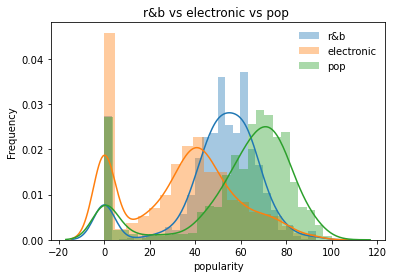

C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

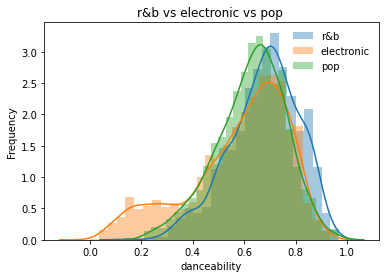

C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

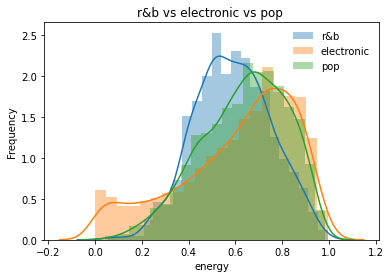

C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

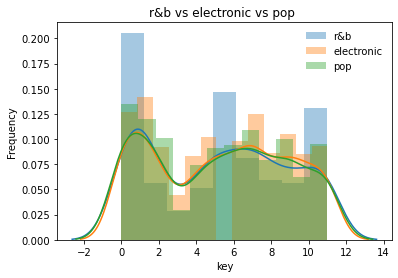

C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

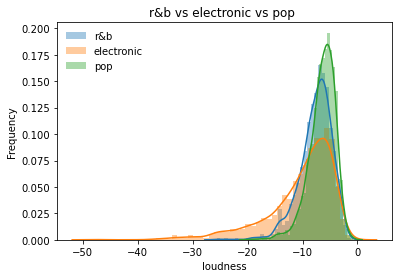

C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

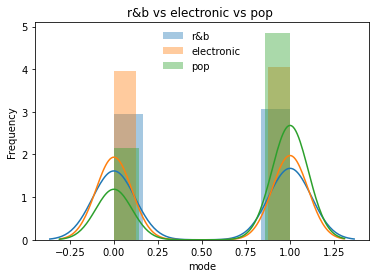

C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

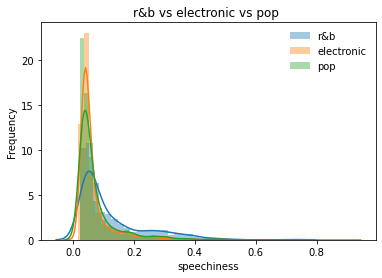

C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

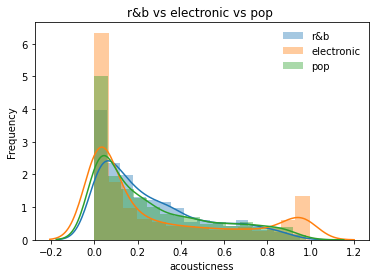

C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

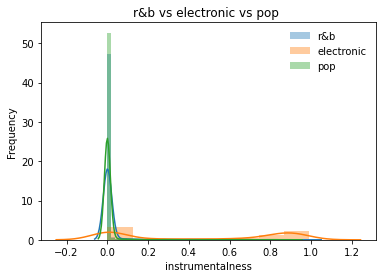

C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

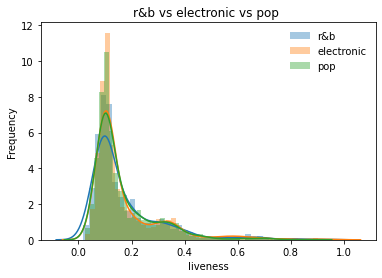

C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

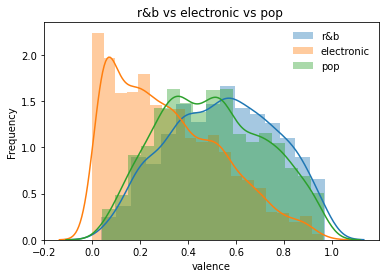

C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

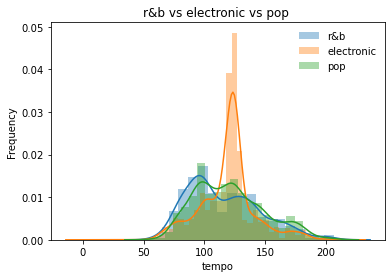

In [26]:
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    fig = plt.figure()
    ax= fig.add_subplot(111)
    
    sns.distplot(tracks1_df[col], ax=ax, label= KEYWORD1)
    sns.distplot(tracks2_df[col], ax=ax, label= KEYWORD2)
    sns.distplot(tracks3_df[col], ax=ax, label= KEYWORD3)
    plt.title("%s vs %s vs %s " % (KEYWORD1,KEYWORD2,KEYWORD3))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()


>Q: What feature/s best distinguish the 2 categories from each other? Does it make sense to use this as a feature for a classification model?

In [27]:
#valence, energy, instrumentalness, tempo, acousticness

## 3. Feature Engineering

In [28]:
#get union of two playlist tracks list
tracks_df = pd.concat([tracks1_df,tracks2_df,tracks3_df])
tracks1_df.shape, tracks2_df.shape, tracks3_df.shape, tracks_df.shape

((1194, 25), (2840, 25), (1785, 25), (5819, 25))

In [29]:
#retain only distinct tracks per keyword
tracks_df =tracks_df.drop_duplicates(subset='track_id')
tracks_df.shape

(5189, 25)

In [30]:
tracks_df.describe()

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins
count,5.189000e+03,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000,5189.000000
mean,2.402504e+05,43.674504,0.611054,0.608354,5.265562,-8.640880,0.571594,0.079620,0.276879,0.236825,0.171294,0.418431,119.018843,4.004174
std,1.224638e+05,25.407296,0.172849,0.216834,3.579854,5.050275,0.494895,0.078783,0.299665,0.370497,0.132786,0.246600,26.536595,2.041063
min,2.976800e+04,0.000000,0.000000,0.000020,0.000000,-48.131000,0.000000,0.000000,0.000002,0.000000,0.017700,0.000000,0.000000,0.496133
25%,1.804350e+05,29.000000,0.521000,0.472000,2.000000,-10.175000,0.000000,0.036900,0.031800,0.000000,0.093700,0.214000,99.991000,3.007250
50%,2.138270e+05,47.000000,0.644000,0.639000,5.000000,-7.328000,1.000000,0.048600,0.150000,0.000120,0.117000,0.399000,120.028000,3.563783
75%,2.624660e+05,63.000000,0.733000,0.776000,8.000000,-5.409000,1.000000,0.082400,0.455000,0.586000,0.203000,0.602000,130.321000,4.374433
max,2.999520e+06,100.000000,0.967000,0.996000,11.000000,-0.314000,1.000000,0.906000,0.996000,0.991000,0.979000,0.972000,218.393000,49.992000


In [31]:
#Normalize loudness
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tracks_df['loudness'] = scaler.fit_transform(tracks_df[['loudness']])
tracks_df['loudness'].describe()

count    5189.000000
mean        0.825859
std         0.105617
min         0.000000
25%         0.793776
50%         0.853316
75%         0.893448
max         1.000000
Name: loudness, dtype: float64

In [32]:
#Normalize tempo
tracks_df['tempo'] =  scaler.fit_transform(tracks_df[['tempo']])
#check
tracks_df['tempo'].describe()


count    5189.000000
mean        0.544976
std         0.121508
min         0.000000
25%         0.457849
50%         0.549596
75%         0.596727
max         1.000000
Name: tempo, dtype: float64

In [33]:
# map genres to numbers
tracks_df['genre_id'] = tracks_df['genre'].map({KEYWORD1:1,KEYWORD2:2,KEYWORD3:3})

## 4. Preview possible groupings

>Q: Pick the 2 best distinguishing features of the 2 playlist sets and plot each row as a scatterplot/distplot colored by genre


<AxesSubplot:xlabel='valence', ylabel='instrumentalness'>

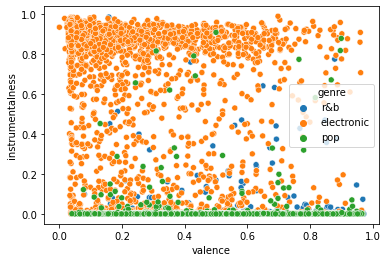

In [34]:
sns.scatterplot(data=tracks_df, x='valence', y='instrumentalness', hue='genre')

C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Localuser\anaconda3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now d

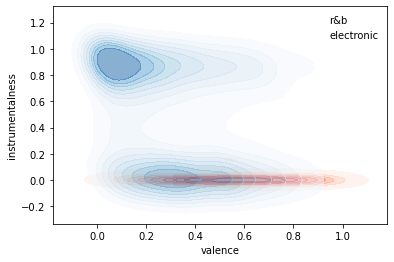

In [35]:
fig = plt.figure()
ax= fig.add_subplot(111)

colormaps = ['Reds','Blues']
for n,genre in enumerate([KEYWORD1,KEYWORD2]):
    df=tracks_df[tracks_df['genre']==genre]
    sns.kdeplot(df['valence'],df['instrumentalness'], ax=ax,\
                shade=True, shade_lowest=False, alpha=0.5, cmap=colormaps[n],\
                label=genre)
    
plt.legend(frameon=False)


> Q: How would you interpret the resulting scatterplot/distribution?

## 5. Model Tuning: KNN

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report

Select audio features to use for the model

In [37]:
# create feature matrix (X)
feature_cols = ['energy','tempo']
X = tracks_df[feature_cols]
y = tracks_df['genre_id']

# creating training set, test set and checking shapes 
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))


Shape of X_Train:(4151, 2)
Shape of y_Train:(4151,)
Shape of X_Test:(1038, 2)
Shape of y_Test:(1038,)


Perform KNN using K= [1..50] and validate using k-fold k = 5

In [38]:
#container for cross validation scares
cv_scores = []

#values of k that we want to test
neighbors=np.arange(2,51)

for k in neighbors:
    print('Fitting for k=%d' % k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

Fitting for k=2
Fitting for k=3
Fitting for k=4
Fitting for k=5
Fitting for k=6
Fitting for k=7
Fitting for k=8
Fitting for k=9
Fitting for k=10
Fitting for k=11
Fitting for k=12
Fitting for k=13
Fitting for k=14
Fitting for k=15
Fitting for k=16
Fitting for k=17
Fitting for k=18
Fitting for k=19
Fitting for k=20
Fitting for k=21
Fitting for k=22
Fitting for k=23
Fitting for k=24
Fitting for k=25
Fitting for k=26
Fitting for k=27
Fitting for k=28
Fitting for k=29
Fitting for k=30
Fitting for k=31
Fitting for k=32
Fitting for k=33
Fitting for k=34
Fitting for k=35
Fitting for k=36
Fitting for k=37
Fitting for k=38
Fitting for k=39
Fitting for k=40
Fitting for k=41
Fitting for k=42
Fitting for k=43
Fitting for k=44
Fitting for k=45
Fitting for k=46
Fitting for k=47
Fitting for k=48
Fitting for k=49
Fitting for k=50


Choose optimal value of K

In [39]:
cv_scores

[0.47000565438649905,
 0.481566989981587,
 0.5083090484682412,
 0.5044562364983399,
 0.516262305539849,
 0.5177072187667637,
 0.5167424934394618,
 0.5184286604903369,
 0.5234918011395764,
 0.5234906412654228,
 0.5266211416061357,
 0.532401954387949,
 0.5266188218578284,
 0.5345703391182057,
 0.5396294202079074,
 0.532401374450872,
 0.5384246009307991,
 0.5331248459542139,
 0.5360172821248895,
 0.5316793527902222,
 0.535535934351123,
 0.5340875415017471,
 0.5348113029736273,
 0.5369762080814232,
 0.5348086932567816,
 0.5340866715961319,
 0.5384237310251838,
 0.53794006350311,
 0.5401084482333667,
 0.5398657445667145,
 0.5379383236918794,
 0.5331190465834457,
 0.5352894610934713,
 0.533844257898018,
 0.5393843967929479,
 0.5360135125338902,
 0.5386609252896061,
 0.5376985197106114,
 0.5403485421831731,
 0.5444440578197266,
 0.540830759862555,
 0.5405886361329795,
 0.5403494120887883,
 0.5374592956664201,
 0.5379403534716484,
 0.5403485421831731,
 0.541072013686515,
 0.5432383686370029,
 

The optimal number of neighbors is 41


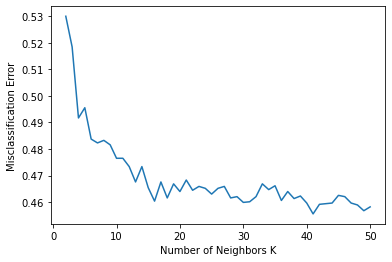

In [40]:
# changing to misclassification error (1-accuracy)
mse = [1 - x for x in cv_scores]

# determining best k -> min
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

Compute accuracy of optimal K for the testing set

In [41]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, Y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 41 is 56.165703%


Create a classification report

In [42]:
print(classification_report(y,knn_optimal.predict(X)))
#support = no. of observations for that particular group in training data 
#high precision = it can identify songs under no 1 among all songs 
#high recall = number 1 among true number 1s

              precision    recall  f1-score   support

           1       0.40      0.25      0.30      1058
           2       0.65      0.78      0.71      2535
           3       0.47      0.43      0.45      1596

    accuracy                           0.57      5189
   macro avg       0.50      0.49      0.49      5189
weighted avg       0.54      0.57      0.55      5189



### - accuracy = all correct /all
- precision =  TP/TP+FP
- recall = TP/TP+FN
- f1-score = weighted average of Precision and Recall
        F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- support = number of items in the class

- macro ave = average of the unweighted mean per label
- weighted ave = average of the weighted mean per label


Plot an ROC curve for each position type prediction using the optimal KNN model

<ipython-input-43-f6caf663fd27>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot('1'+str(len(genres))+str(i))
<ipython-input-43-f6caf663fd27>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot('1'+str(len(genres))+str(i))
<ipython-input-43-f6caf663fd27>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot('1'+str(len(genres))+str(i))


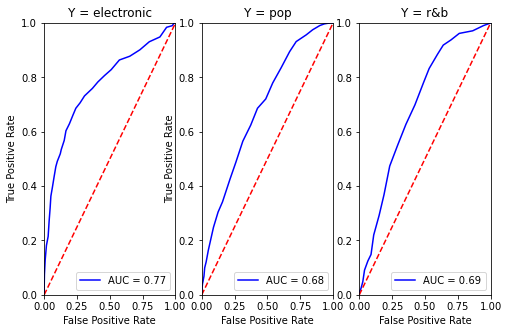

In [43]:
y_scores = knn_optimal.predict_proba(X_test)
genres = tracks_df['genre'].unique()

fig = plt.figure(figsize=[8,5])

for i in np.arange(len(genres)):
    genre_id = i+1
    y_test =[1 if k==genre_id else 0 for k in Y_test]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, i])
    roc_auc = auc(fpr, tpr)

    ax = fig.add_subplot('1'+str(len(genres))+str(i))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Y = '+str(genres[i]))


## 6. Model Tuning: SVM

In [44]:
from sklearn.svm import SVC

In [45]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    xmgn= (x.max()-x.min())*0.25
    ymgn = (y.max()-y.min())*0.25
    
    x_min, x_max = x.min() - xmgn, x.max() + xmgn
    y_min, y_max = y.min() - ymgn, y.max() + ymgn
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, xlims,ylims, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    
    return out

#visualize support vectors
def plot_vector_bounds(X,svm_model):
    fig,ax=plt.subplots()

    X0 = X.to_numpy()[:, 0]
    X1 = X.to_numpy()[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, svm_model, xx, yy, [0,1],[0,1],
                      cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [46]:
# create feature matrix (X)
feature_cols = ['energy','tempo']
X = tracks_df[feature_cols]
y = tracks_df['genre_id']

# creating training set, test set and checking shapes 
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))


Shape of X_Train:(4151, 2)
Shape of y_Train:(4151,)
Shape of X_Test:(1038, 2)
Shape of y_Test:(1038,)


>Q: Go back to the scatter/distplot. What seems to be the appropriate kernel type to use for the classification?

Fit model and use at least 2 kernels

In [47]:
svm_model1 = SVC(kernel='linear')
pred1 = svm_model1.fit(X, y) 

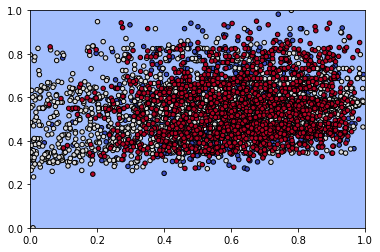

In [48]:
#plot bounds
plot_vector_bounds(X,svm_model1)

In [49]:
#show classification
print(classification_report(y,svm_model1.predict(X)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1058
           2       0.49      1.00      0.66      2535
           3       0.00      0.00      0.00      1596

    accuracy                           0.49      5189
   macro avg       0.16      0.33      0.22      5189
weighted avg       0.24      0.49      0.32      5189



C:\Users\Localuser\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
#polynomial kernel
svm_model2 = SVC(kernel='poly', degree=3, gamma=0.9)
pred2 = svm_model2.fit(X, y) 

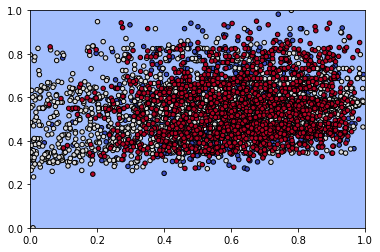

In [51]:
#plot bounds
plot_vector_bounds(X,svm_model2)

In [52]:
#show classification
print(classification_report(y,svm_model2.predict(X)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1058
           2       0.49      1.00      0.66      2535
           3       0.00      0.00      0.00      1596

    accuracy                           0.49      5189
   macro avg       0.16      0.33      0.22      5189
weighted avg       0.24      0.49      0.32      5189



C:\Users\Localuser\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
#polynomial kernel
svm_model3 = SVC(kernel='rbf', gamma=0.8)
pred3 = svm_model3.fit(X, y) 

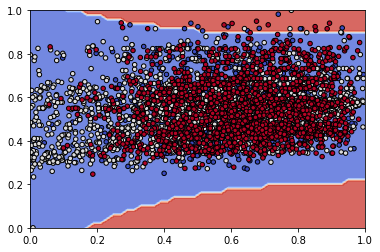

In [54]:
#plot bounds
plot_vector_bounds(X,svm_model3)

In [55]:
#show classification
print(classification_report(y,svm_model3.predict(X)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1058
           2       0.49      1.00      0.66      2535
           3       0.35      0.01      0.01      1596

    accuracy                           0.49      5189
   macro avg       0.28      0.33      0.22      5189
weighted avg       0.35      0.49      0.32      5189



C:\Users\Localuser\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 7. Model Selection

Which between KNN and SVM performed better? 
Create a column matching the predicted genre and probability of the better model to each of the tracks

In [56]:
#for every x in the row, it will use the optimal function
tracks_df['predicted_genre_id'] = tracks_df.apply(lambda x:  knn_optimal.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
#probability of that particular genre as a prediction
tracks_df['predicted_genre_prob'] = tracks_df.apply(lambda x:  np.max(knn_optimal.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
tracks_df

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,tempo,playlist_id_x,playlist_name_x,playlist_id_y,playlist_name_y,duration_mins,genre,genre_id,predicted_genre_id,predicted_genre_prob
0,0XkQ23l4GT8sFHgeNRGAO4,LET'S GET MARRIED,2HPaUgqeutzr3jx5a9WyDV,PARTYNEXTDOOR,2Uyia7M6Hv8XmhMSEbpfgm,224014,2021-01-29,60,0.501,0.643,...,0.599149,37i9dQZF1DX4SBhb3fqCJd,Are & Be,37i9dQZF1DX4SBhb3fqCJd,Are & Be,3.733567,r&b,1,2,0.512195
3,3YJJjQPAbDT7mGpX3WtQ9A,Good Days,7tYKF4w9nC0nq9CsPZTHyP,SZA,781cKhbTPwLnPmo9BALQl7,279204,2020-12-25,92,0.436,0.655,...,0.554056,37i9dQZF1DX4SBhb3fqCJd,Are & Be,37i9dQZF1DX4SBhb3fqCJd,Are & Be,4.653400,r&b,1,2,0.780488
7,5VlTQnZO89Ioku8ssdbqJk,Dead Man Walking,3tlXnStJ1fFhdScmQeLpuG,Brent Faiyaz,7JN4bDXgC4mDcuhghlFBHc,247079,2020-09-18,82,0.505,0.267,...,0.659037,37i9dQZF1DX4SBhb3fqCJd,Are & Be,37i9dQZF1DX4SBhb3fqCJd,Are & Be,4.117983,r&b,1,2,0.536585
11,0KS2h61pHQ4WmOwruD7uxD,Damage,3Y7RZ31TRPVadSFVy1o8os,H.E.R.,2pPGkrEYiHUmqSyg3sAGII,223414,2020-10-21,73,0.646,0.696,...,0.372430,37i9dQZF1DX4SBhb3fqCJd,Are & Be,37i9dQZF1DX4SBhb3fqCJd,Are & Be,3.723567,r&b,1,1,0.390244
13,5XqDJFVCyRTm5J7cIfRmR1,Not Another Love Song,7HkdQ0gt53LP4zmHsL0nap,Ella Mai,5QJAMz9LqY5DC2BAjLmO7p,217801,2020-10-02,73,0.499,0.612,...,0.719886,37i9dQZF1DX4SBhb3fqCJd,Are & Be,37i9dQZF1DX4SBhb3fqCJd,Are & Be,3.630017,r&b,1,3,0.463415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780,5icOoE6VgqFKohjWWNp0Ac,Here With Me,64KEffDW9EtZ1y2vBYgq8T,Marshmello,6NHS3hV16MZyfcp0nSHdrd,156346,2019-03-08,78,0.791,0.565,...,0.457712,37i9dQZF1DX92MLsP3K1fI,Top Pop,37i9dQZF1DX92MLsP3K1fI,Top Pop,2.605767,pop,3,3,0.439024
1781,4YAg8h8WliHZlW5wuv8Jpk,To Be Young (feat. Doja Cat),1zNqDE7qDGCsyzJwohVaoX,Anne-Marie,4GulJ0PbD2o6ThcdvIw8Bd,194758,2020-07-13,73,0.525,0.649,...,0.714286,37i9dQZF1DX92MLsP3K1fI,Top Pop,37i9dQZF1DX92MLsP3K1fI,Top Pop,3.245967,pop,3,3,0.414634
1782,7JDWhC422Gtk1Bq0mL3OTC,feel something,1o2NpYGqHiCq7FoiYdyd1x,Bea Miller,6qLQLAHnS54MLHY8wxXDX5,180161,2019-06-21,82,0.740,0.415,...,0.622863,37i9dQZF1DX92MLsP3K1fI,Top Pop,37i9dQZF1DX92MLsP3K1fI,Top Pop,3.002683,pop,3,3,0.414634
1783,2IHLaN6wwYKQ3S24NsQqpA,I Love Me,6S2OmqARrzebs0tKUEyXyp,Demi Lovato,3VKVZ7PvA64NtVJChPGDaH,203672,2020-03-06,76,0.664,0.561,...,0.687261,37i9dQZF1DX92MLsP3K1fI,Top Pop,37i9dQZF1DX92MLsP3K1fI,Top Pop,3.394533,pop,3,3,0.585366


Check tracks mistakenly classified with but high probability 

In [57]:
tracks_df[(tracks_df['predicted_genre_id']!=tracks_df['genre_id'])&(tracks_df['predicted_genre_prob']>0.9)]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,tempo,playlist_id_x,playlist_name_x,playlist_id_y,playlist_name_y,duration_mins,genre,genre_id,predicted_genre_id,predicted_genre_prob
582,51H2y6YrNNXcy3dfc3qSbA,When Doves Cry,5a2EaR3hamoenG9rDuVn8j,Prince,7nXJ5k4XgRj5OLg9m8V3zc,352906,1984-06-25,70,0.729,0.9890,...,0.579094,37i9dQZF1DX6JzJ8vAK836,This Is Prince,37i9dQZF1DX6JzJ8vAK836,This Is Prince,5.881767,r&b,1,2,0.902439
642,1Az0fhiWi0EVS4cZ3FF20X,Sometimes It Snows in April,5a2EaR3hamoenG9rDuVn8j,Prince,54DjkEN3wdCQgfCTZ9WjdB,409000,1986-03-31,51,0.494,0.0644,...,0.475093,37i9dQZF1DX6JzJ8vAK836,This Is Prince,37i9dQZF1DX6JzJ8vAK836,This Is Prince,6.816667,r&b,1,2,0.951220
643,42wNLGw0VBuwniTFB5ljda,Venus De Milo,5a2EaR3hamoenG9rDuVn8j,Prince,54DjkEN3wdCQgfCTZ9WjdB,115426,1986-03-31,36,0.291,0.0420,...,0.390791,37i9dQZF1DX6JzJ8vAK836,This Is Prince,37i9dQZF1DX6JzJ8vAK836,This Is Prince,1.923767,r&b,1,2,0.926829
45,6XcfKZvJio9Z0fQy11GnNX,broken,4KJ6jujcNPzOyhdNoiNftp,lovelytheband,2AbPwLvpR0FwpqGt4ZY1q4,204878,2018-08-03,75,0.666,0.7280,...,0.563187,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,3.414633,pop,3,2,0.902439
161,4h0zU3O9R5xzuTmNO7dNDU,Lost Boy,2WzaAvm2bBCf4pEhyuDgCY,Ruth B.,7drYNu2imHk188vP81icR3,275280,2015-08-21,76,0.710,0.0565,...,0.567756,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,37i9dQZF1DWTwnEm1IYyoj,Soft Pop Hits,4.588000,pop,3,2,0.926829
383,0L6PVWWRbAes5G62y5W1Zp,Tick Tock (feat. 24kGoldn) - Joel Corry Remix,6MDME20pz9RveH9rEXvrOM,Clean Bandit,7aqkAkcpzYW1SVBxqnk9xV,159056,2020-09-11,23,0.771,0.9220,...,0.567656,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,Pop Remix,2.650933,pop,3,2,0.902439
552,0CnpSTdL9l5vQM4YnzXtyo,Panorama,5r1tUTxVSgvBHnoDuDODPH,IZ*ONE,3gfl9D7cMW3K87YiMbqsWK,222853,2020-12-07,77,0.726,0.9630,...,0.577225,37i9dQZF1DX9tPFwDMOaN1,K-Pop Daebak,37i9dQZF1DX9tPFwDMOaN1,K-Pop Daebak,3.714217,pop,3,2,0.902439
802,43zdsphuZLzwA9k4DJhU0I,when the party's over,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,0S0KGZnfBGSIssfF54WSJh,196077,2019-03-29,86,0.367,0.1110,...,0.378410,37i9dQZF1DX3WvGXE8FqYX,Women of Pop,37i9dQZF1DX3WvGXE8FqYX,Women of Pop,3.267950,pop,3,2,0.926829
830,1FMm3wG5WOhi7js35KR7Ea,"You're Gonna Go Far, Kid",5LfGQac0EIXyAN8aUwmNAQ,The Offspring,3LhnJMmYkizRwyHdw8y0Qr,177826,2008-06-13,0,0.550,0.9180,...,0.577322,37i9dQZF1DXa9wYJr1oMFq,Pop Punk Powerhouses,37i9dQZF1DXa9wYJr1oMFq,Pop Punk Powerhouses,2.963767,pop,3,2,0.926829
951,1v4HRWBmiwBcJODNWyhKO6,Another Year,37M5pPGs6V1fchFJSgCguX,FINNEAS,6Mr0pFl9kcZQJt9OCULVwC,256648,2020-12-01,68,0.596,0.0992,...,0.367141,37i9dQZF1DX0A8zVl7p82B,Christmas Pop,37i9dQZF1DX0A8zVl7p82B,Christmas Pop,4.277467,pop,3,2,0.902439


> Q: Focus on any of the songs you know that made it in the misclassified list (you may listen to some of them) 
    Does it make sense that the model misclassfied this song? Why or why not?

>Q: Would this model correctly classify tracks from the Spotify charting tracks dataset?

In [58]:
chart_tracks_df = pd.read_csv("data/spotify_daily_charts_tracks.csv")
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,76,0.578,0.574,2,-6.209,1,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,88,0.358,0.557,10,-7.398,1,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,87,0.748,0.524,8,-5.599,1,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,71,0.662,0.586,0,-8.821,1,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,1,0.783,0.623,7,-6.126,1,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [59]:
chart_tracks_df['predicted_genre_id'] = chart_tracks_df.apply(lambda x:  knn_optimal.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
chart_tracks_df['predicted_genre_prob'] = chart_tracks_df.apply(lambda x:  np.max(knn_optimal.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre_prob
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,76,0.578,0.574,...,-6.209,1,0.0454,0.196,0.00000,0.0830,0.301,174.152,3,0.439024
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,88,0.358,0.557,...,-7.398,1,0.0590,0.695,0.00000,0.0902,0.494,85.043,3,0.439024
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,87,0.748,0.524,...,-5.599,1,0.0338,0.414,0.00000,0.1110,0.661,95.010,3,0.439024
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,71,0.662,0.586,...,-8.821,1,0.0307,0.097,0.00272,0.1150,0.296,90.000,3,0.439024
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,1,0.783,0.623,...,-6.126,1,0.0800,0.338,0.00000,0.0975,0.447,100.048,3,0.439024


In [60]:
#Check tracks classified with higher probability
chart_tracks_df.sort_values(['predicted_genre_prob'])[:10]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre_prob
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,76,0.578,0.574,...,-6.209,1,0.0454,0.196000,0.000000,0.0830,0.301,174.152,3,0.439024
2184,44vXWYTcdrejrIQZEoHzl8,Lights,3Nrfpe0tUJi4K4DXYWgMUX,BTS,0rHMQLHyw0Bt17fRTJEqh6,292773,2019-07-03,70,0.625,0.663,...,-5.115,1,0.0302,0.112000,0.000000,0.1050,0.398,98.998,3,0.439024
2185,6kls8cSlUyHW2BUOkDJIZE,Hate Me (with Juice WRLD),0X2BH1fck6amBIoJhDVmmJ,Ellie Goulding,29FoTD5vBY3Fq1QWhbl3FM,186223,2019-06-26,83,0.657,0.768,...,-4.628,1,0.0507,0.108000,0.000000,0.1440,0.759,75.025,3,0.439024
2186,6IwKcFdiRQZOWeYNhUiWIv,No One,3DiDSECUqqY1AuBP8qtaIa,Alicia Keys,6KlxyxhXEDo1LdheFulN7h,253813,2007-11-09,82,0.644,0.548,...,-5.416,0,0.0286,0.020900,0.000009,0.1340,0.166,90.042,3,0.439024
2187,5ug4vqGZ3eisGhY1IsziNX,Best Part of Me (feat. YEBBA),6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,6Z5DhADmyybfKNdymaPLjB,243266,2019-07-05,73,0.565,0.242,...,-8.367,1,0.0318,0.762000,0.000009,0.2850,0.237,81.657,3,0.439024
2188,6vBdBCoOhKHiYDDOcorfNo,Goodbyes (Feat. Young Thug),246dkjvS1zLTtiykXe5h60,Post Malone,4FFBjcmX06VmazABtpRMyv,174960,2019-07-05,16,0.580,0.653,...,-3.818,1,0.0745,0.447000,0.000000,0.1110,0.175,150.231,3,0.439024
2189,2gTdDMpNxIRFSiu7HutMCg,I Think I'm OKAY (with YUNGBLUD & Travis Barker),6TIYQ3jFPwQSRmorSezPxX,Machine Gun Kelly,0bJIHF1Or1YBLFBMwv53K2,169397,2019-07-05,83,0.628,0.744,...,-4.718,1,0.0379,0.025700,0.000000,0.3130,0.277,119.921,3,0.439024
2190,6EbduYTr62sSzvl36wWiFM,BLOW (with Chris Stapleton & Bruno Mars),6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,4uoEruXjt0APvHaSqrwqPH,209120,2019-07-05,68,0.631,0.796,...,-5.350,1,0.0401,0.000245,0.011500,0.3800,0.596,92.469,3,0.439024
2191,4TBtGrMgUYH7D5Tf5HLvyz,Let's Do It Again,7oEWmZ9dKlAVxTgmjUbYr4,J Boog,7oyBRhMZuVDSdDk7uQOGzI,192177,2011-09-27,73,0.631,0.696,...,-5.631,0,0.2110,0.578000,0.000000,0.0784,0.927,173.537,3,0.439024
2192,5dW1VZPcFqB4n0P08rGDgm,The Git Up,3yzRiNMZdTsSUgplcyYZ4i,Blanco Brown,00xSEAMEAPTF17t2rdOFYF,200593,2019-05-03,5,0.847,0.678,...,-8.635,1,0.1090,0.066900,0.000000,0.2740,0.811,97.984,3,0.439024


<AxesSubplot:>

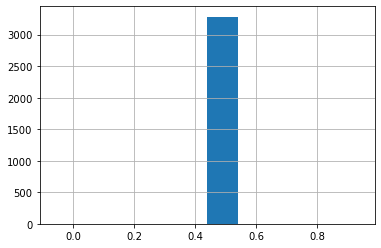

In [61]:
#View histogram of probabilities
chart_tracks_df['predicted_genre_prob'].hist()

### Day 7 Exercise
1. *Genre Classification (Individual)*

    A. Choose up to 6 music genres and obtain track data from the genre's top 20 most-followed playlists in Spotify. A group may distribute the data gathering task by assigning a genre to each person and then pooling all the gathered data in one shared folder. Alternatively, you may also use the provided sample playlist data.
    
   B. Pick any 2 music genres as your groupings for the classification exercise and repeat Steps 1-7. Make sure to answer the guide questions for each step
   
   C. Increase the number of features included in the models and repeat Steps 1-7 (but skip code cells for plotting-- viz for >2D will not work). How does this affect the model scores? Find the combination of features that will give you the best accuracy score.
   
   D. CHALLENGE (optional) Modify the notebook to take in any 3 music genres as groupings and repeat Steps 1-7.
   

2. *(Optional, but useful to do ahead for your sprint project)*

    There are almost [innumerable](https://www.musicgenreslist.com/) named music genres online, but a summarized list  may be found [here](https://www.blisshq.com/music-library-management-blog/2011/01/25/fundamental-music-genre-list/). Can you build a model that can predict **at least 5 genres** listed in the latter with **>70% classification accuracy**?
    